In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Task
The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.



Here is all the data you need:
"car data.csv"

## Data loading

### Subtask:
Load the car data from "car data.csv" into a pandas DataFrame.


**Reasoning**:
Load the car data from the CSV file into a pandas DataFrame and display the head and info.



In [1]:
import pandas as pd

df = pd.read_csv('car data.csv')
display(df.head())
df.info()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## Data exploration

### Subtask:
Explore the car price dataset to understand its characteristics.


**Reasoning**:
Analyze the distribution of key numerical features, examine categorical features, investigate the relationship between 'Selling_Price' and other features, and check for data quality issues.



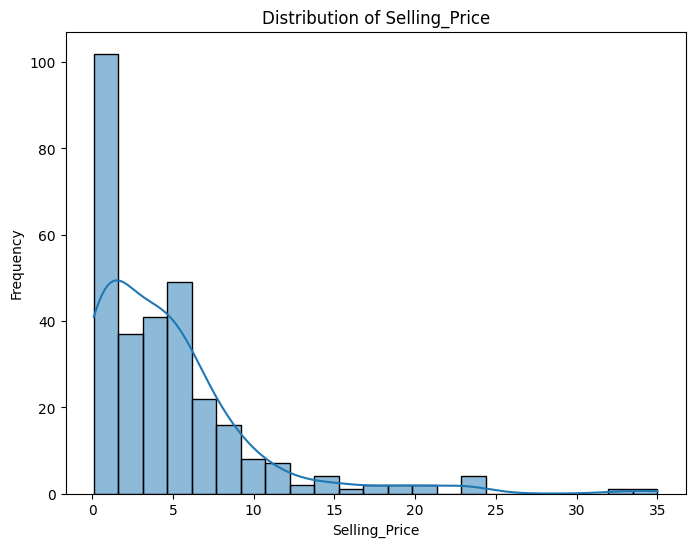

Descriptive Statistics for Selling_Price:
count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64


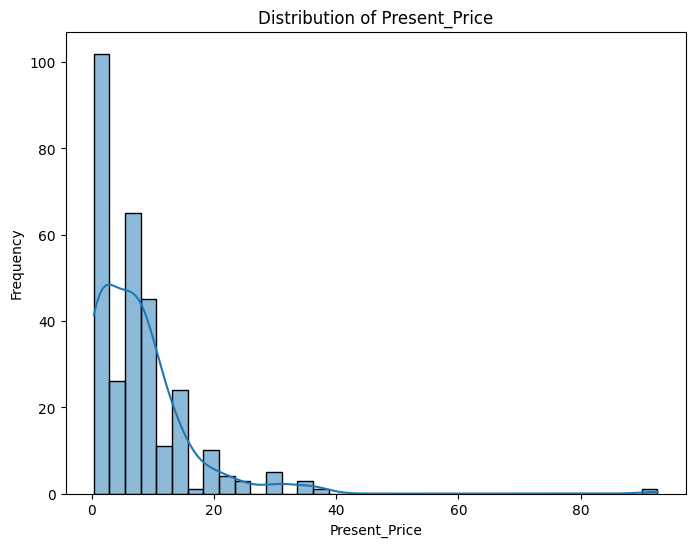

Descriptive Statistics for Present_Price:
count    301.000000
mean       7.628472
std        8.642584
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64


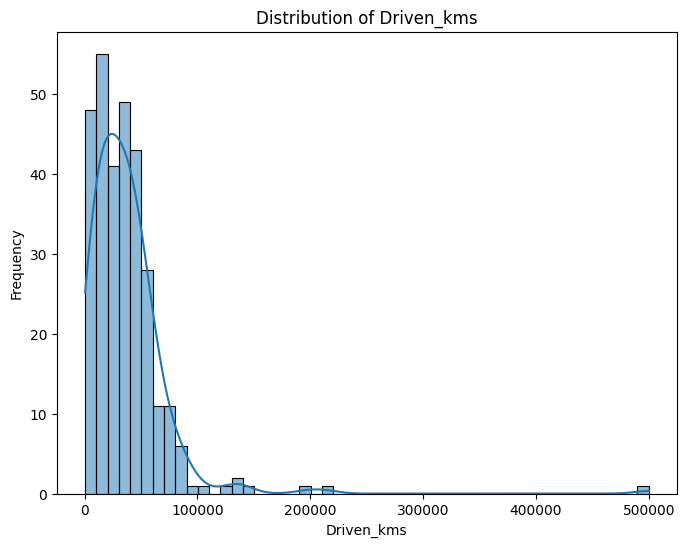

Descriptive Statistics for Driven_kms:
count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: Driven_kms, dtype: float64


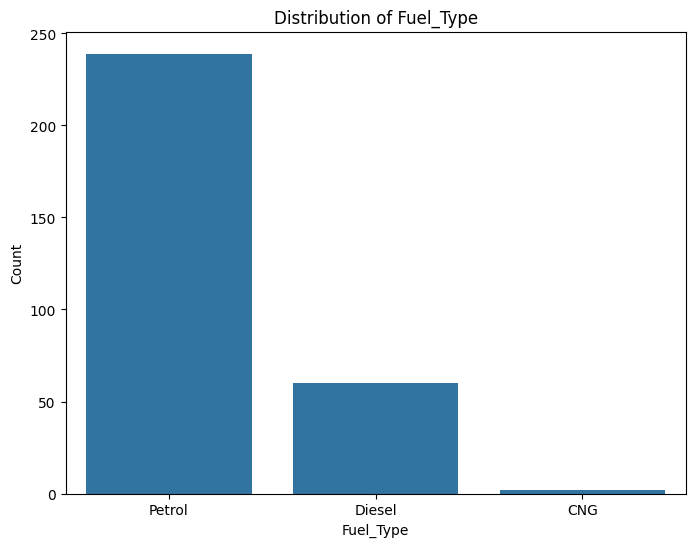

Unique values and their frequencies for Fuel_Type:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


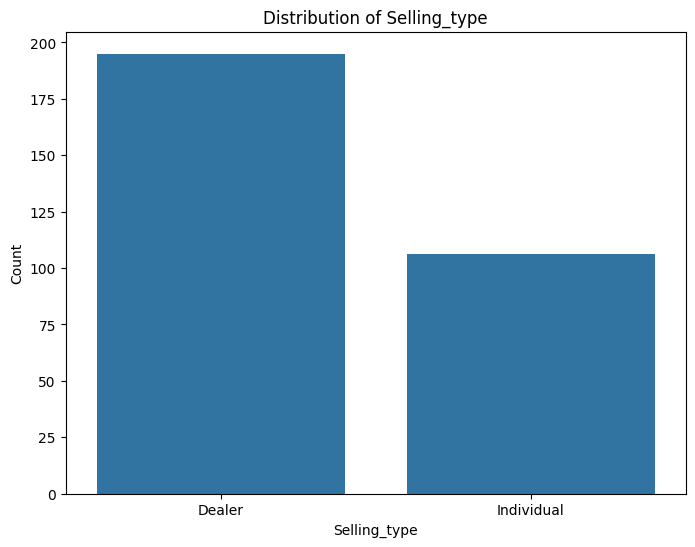

Unique values and their frequencies for Selling_type:
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64


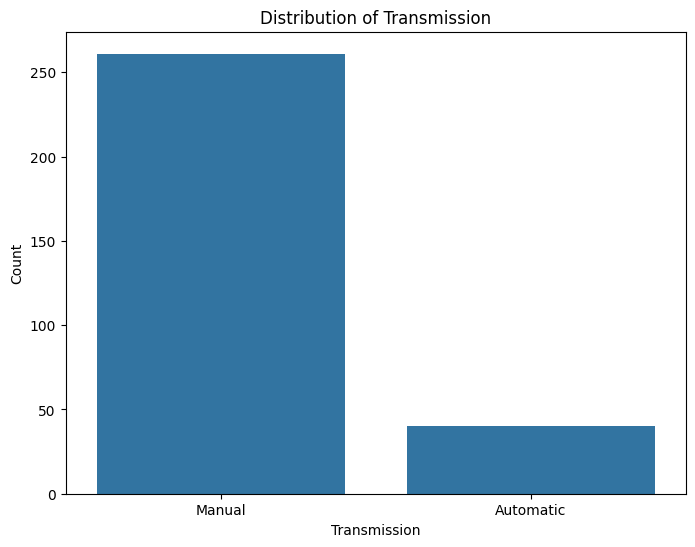

Unique values and their frequencies for Transmission:
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


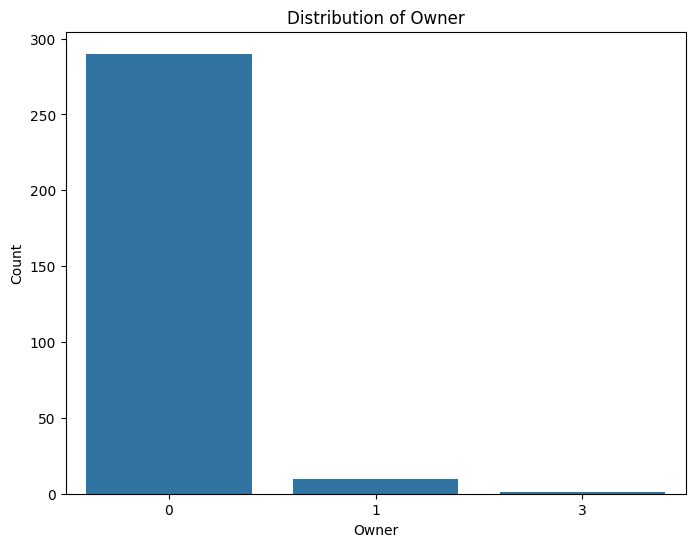

Unique values and their frequencies for Owner:
Owner
0    290
1     10
3      1
Name: count, dtype: int64


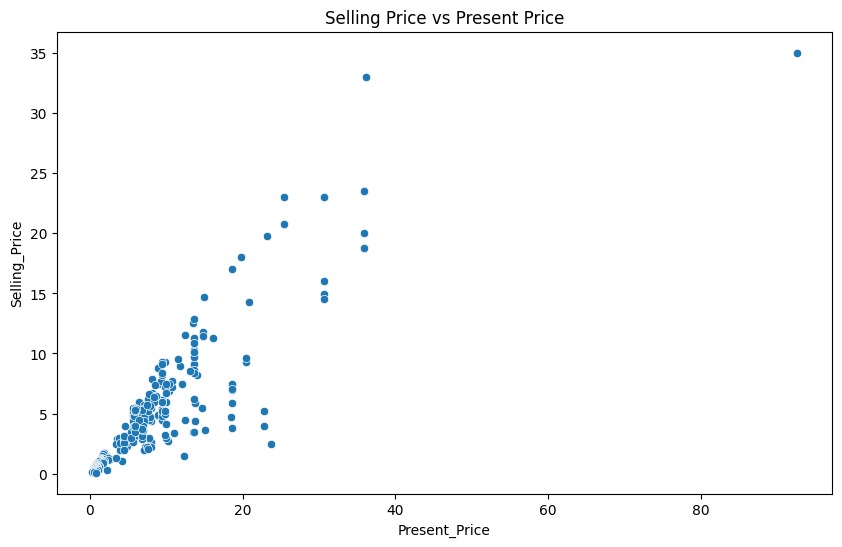

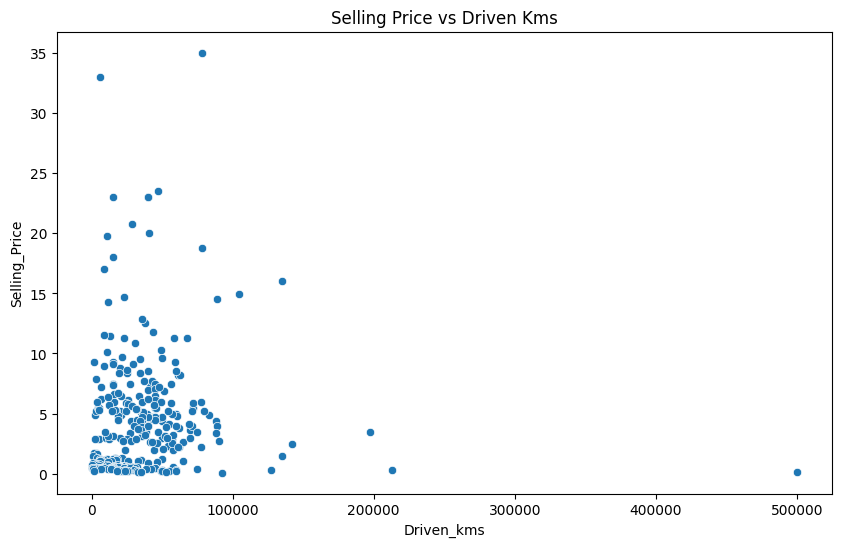

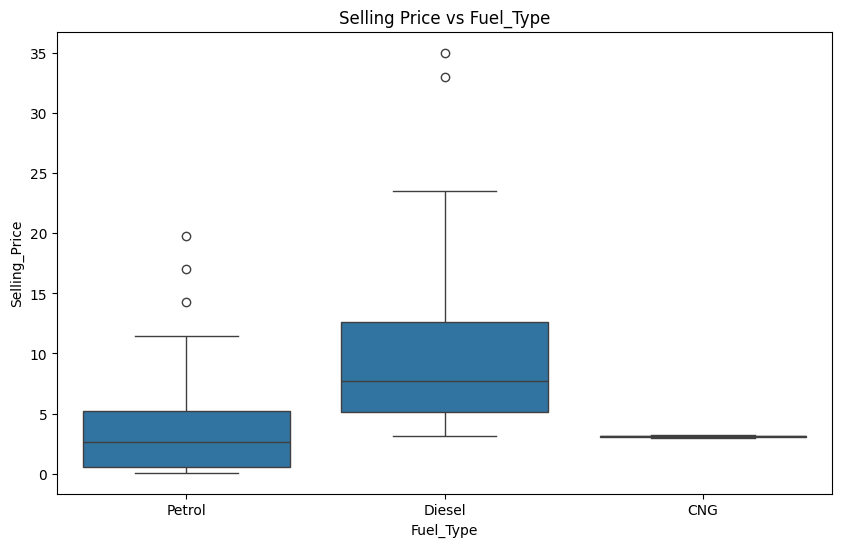

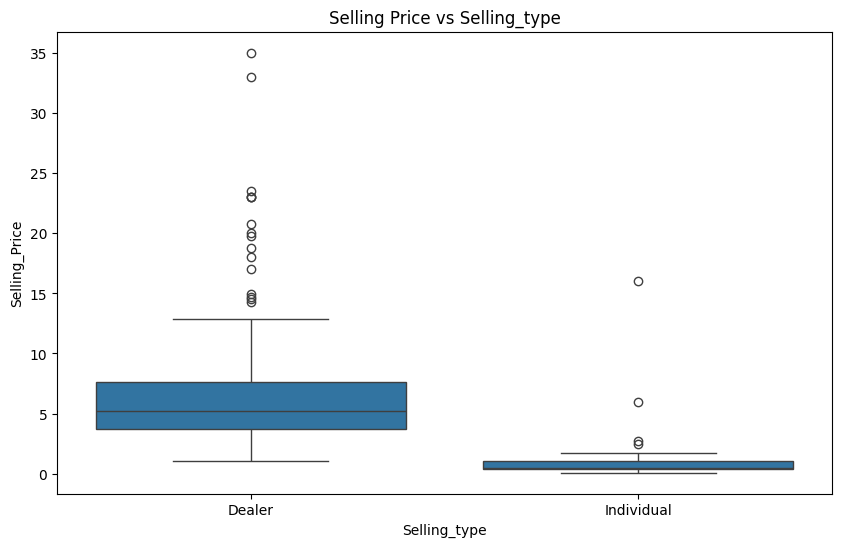

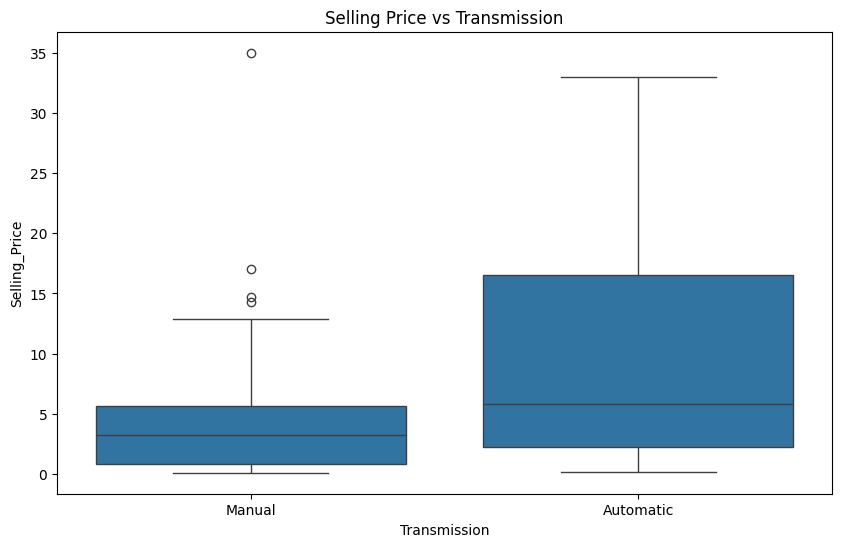

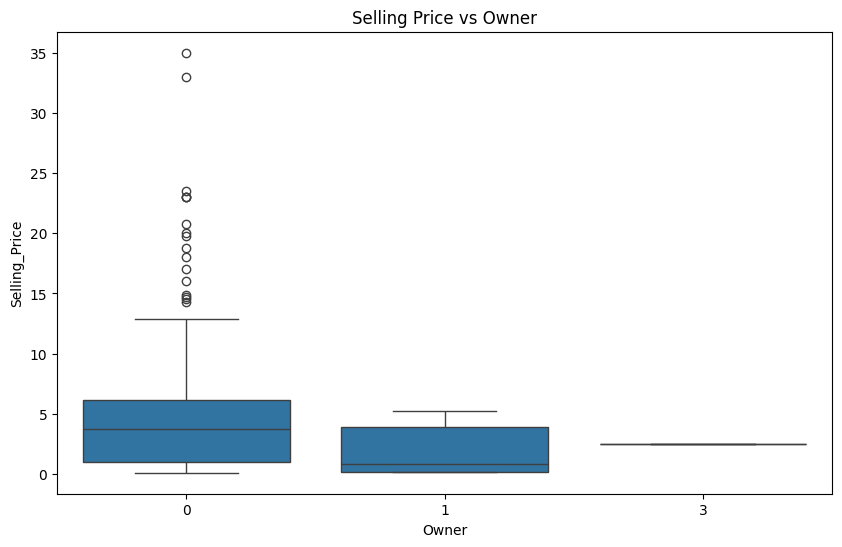

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
(301, 9)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features analysis
numerical_features = ['Selling_Price', 'Present_Price', 'Driven_kms']
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    print(f'Descriptive Statistics for {col}:')
    print(df[col].describe())

# Categorical features analysis
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    print(f"Unique values and their frequencies for {col}:")
    print(df[col].value_counts())

# Relationship between 'Selling_Price' and other features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Selling Price vs Present Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Selling Price vs Driven Kms')
plt.show()


for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Selling_Price', data=df)
    plt.title(f'Selling Price vs {col}')
    plt.show()

# Data quality check
print(df.info())
print(df.isnull().sum())
print(df.shape)

## Data cleaning

### Subtask:
Clean the car price dataset by handling potential outliers and inconsistencies.


**Reasoning**:
Handle outliers in numerical features ('Selling_Price', 'Present_Price', and 'Driven_kms') using IQR method, then check for inconsistencies in categorical features and handle missing values if any.



In [3]:
import numpy as np

# Outlier handling for numerical features using IQR
for col in ['Selling_Price', 'Present_Price', 'Driven_kms']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Check for inconsistencies in categorical features and correct them.
# 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'
df['Fuel_Type'] = df['Fuel_Type'].str.strip()
df['Selling_type'] = df['Selling_type'].str.strip()
df['Transmission'] = df['Transmission'].str.strip()

# Recheck for missing values after outlier handling
print(df.isnull().sum())

# Verify data quality
print(df.info())
print(df.shape)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    float64
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB
None
(301, 9)


## Feature engineering

### Subtask:
Engineer new features from the existing data to improve model performance.


**Reasoning**:
Create the 'Car_Age' feature, one-hot encode categorical features, drop unnecessary columns, and inspect the resulting DataFrame.



In [4]:
import pandas as pd

# Calculate car age
current_year = 2025
df['Car_Age'] = current_year - df['Year']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Drop unnecessary columns
columns_to_drop = ['Car_Name', 'Year', 'Fuel_Type', 'Selling_type', 'Transmission']
df_encoded = df_encoded.drop(columns=columns_to_drop)

# Inspect the resulting DataFrame
display(df_encoded.head())
print(df_encoded.info())

KeyError: "['Fuel_Type', 'Selling_type', 'Transmission'] not found in axis"

**Reasoning**:
The previous code failed due to a KeyError because the columns to be dropped were not found in the axis after one-hot encoding. The columns 'Fuel_Type', 'Selling_type', and 'Transmission' have been replaced by their one-hot encoded counterparts. Correct the columns to drop in the code.



In [5]:
import pandas as pd

# Calculate car age
current_year = 2025
df['Car_Age'] = current_year - df['Year']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Drop unnecessary columns.  The original categorical columns no longer exist after one-hot encoding, so we need to drop the newly created ones.
columns_to_drop = ['Car_Name', 'Year']
# Get the names of one-hot encoded columns and drop them
for col in ['Fuel_Type', 'Selling_type', 'Transmission']:
  for encoded_col in df_encoded.columns:
    if encoded_col.startswith(col):
      columns_to_drop.append(encoded_col)
      break # Drop only one column from each original categorical column

df_encoded = df_encoded.drop(columns=columns_to_drop)


# Inspect the resulting DataFrame
display(df_encoded.head())
print(df_encoded.info())

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Petrol
0,3.35,5.59,27000.0,0,11,True
1,4.75,9.54,43000.0,0,12,False
2,7.25,9.85,6900.0,0,8,True
3,2.85,4.15,5200.0,0,14,True
4,4.60,6.87,42450.0,0,11,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Selling_Price     301 non-null    float64
 1   Present_Price     301 non-null    float64
 2   Driven_kms        301 non-null    float64
 3   Owner             301 non-null    int64  
 4   Car_Age           301 non-null    int64  
 5   Fuel_Type_Petrol  301 non-null    bool   
dtypes: bool(1), float64(3), int64(2)
memory usage: 12.2 KB
None


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [6]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train a Random Forest Regressor model to predict the selling price of cars.


**Reasoning**:
Train a RandomForestRegressor model using the training data.



In [7]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained Random Forest Regressor model.


**Reasoning**:
Use the trained model to predict on the test set and evaluate the model's performance using relevant metrics.



In [8]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.7728070993442622
Root Mean Squared Error (RMSE): 0.8790944769160265
R-squared: 0.941010679774469
Mean Absolute Error (MAE): 0.5748393442622955


## Data visualization

### Subtask:
Visualize key findings and model performance.


**Reasoning**:
Visualize the relationship between actual and predicted selling prices, the distribution of residuals, and feature importances using appropriate plots.



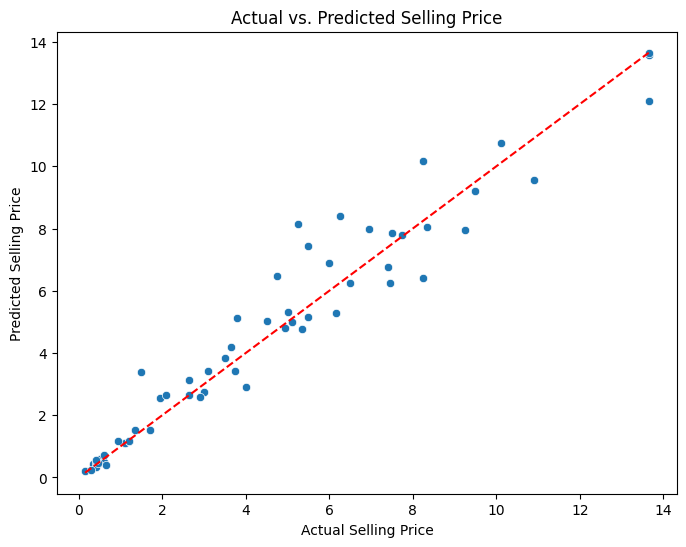

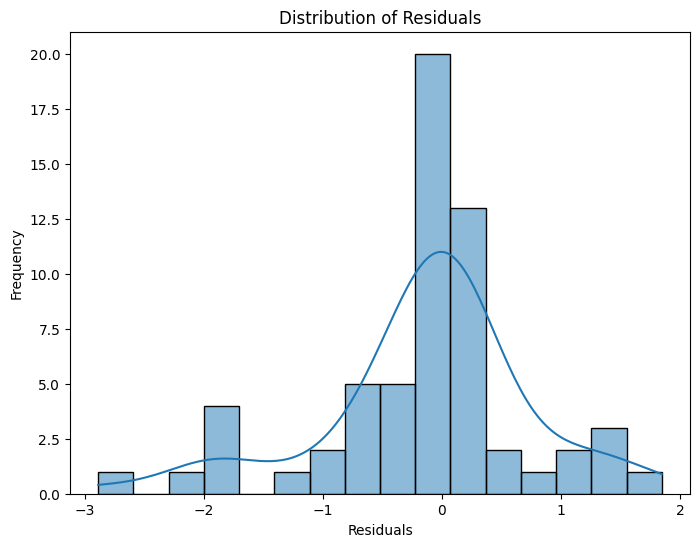

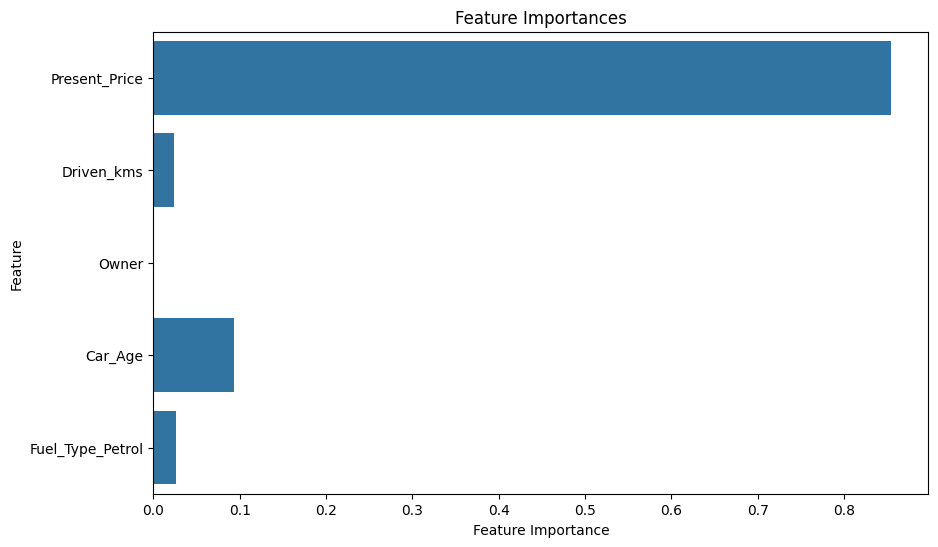

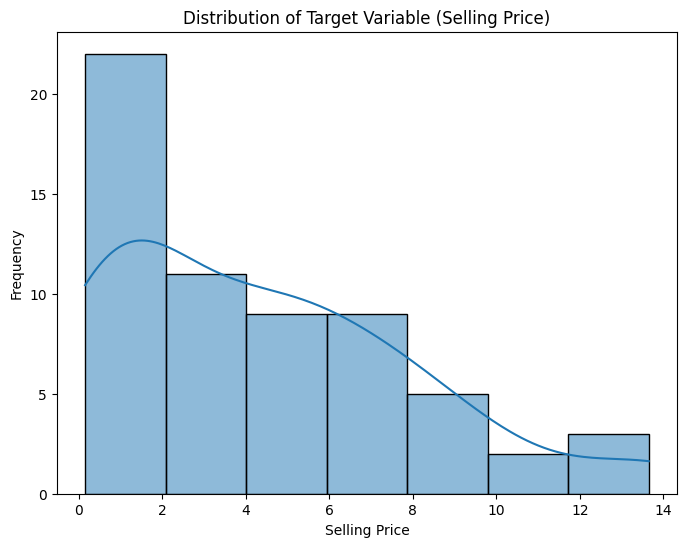

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Scatter plot of actual vs. predicted selling prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price")
plt.show()

# 2. Histogram of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


# 3. Bar chart of feature importances
plt.figure(figsize=(10, 6))
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()

# 4. Additional visualization: Distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(y_test, kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable (Selling Price)')
plt.show()

## Summary:

### Q&A
No questions were posed in the provided task.

### Data Analysis Key Findings
* **Data Cleaning:** Outliers in 'Selling\_Price', 'Present\_Price', and 'Driven\_kms' were capped using the IQR method.  Whitespace was removed from categorical features. No missing values were found.
* **Feature Engineering:** 'Car\_Age' was created. Categorical features ('Fuel\_Type', 'Selling\_type', 'Transmission') were one-hot encoded.  Unnecessary columns were dropped.
* **Model Performance:** The Random Forest Regressor achieved an R-squared of 0.94, RMSE of 0.88, and MAE of 0.57 on the test set.  These metrics suggest a good model fit and prediction accuracy.  The specific meaning of these values depends on the scale of the target variable (selling price).
* **Feature Importance:** A visualization of feature importances was generated, allowing identification of the most influential features in predicting selling price.


### Insights or Next Steps
* Investigate the most important features identified in the feature importance analysis to understand their impact on car prices.
* Explore other regression models (e.g., Gradient Boosting, Support Vector Regression) and hyperparameter tuning to potentially improve model performance.
